## 分析A/B测试结果

这个项目可以帮你确认你已经掌握了统计课程中涵盖的所有内容。 希望这个项目尽可能地涵盖所有内容。 祝你好运！

## 目录
- [简介](#intro)
- [I - 概率](#probability)
- [II - A/B 测试](#ab_test)
- [III - 回归](#regression)


<a id='intro'></a>
### 简介

通常情况下，A/B 测试由数据分析师和数据科学家来完成。如果你在一些实践工作中遇到过这方面的问题，那学习起来就会更加游刃有余。

对于这个项目，你将要了解的是电子商务网站运行的 A/B 测试的结果。你的目标是通过这个 notebook 来帮助公司弄清楚他们是否应该使用新的页面，保留旧的页面，或者应该将测试时间延长，之后再做出决定。

**使用该 notebook 的时候，请同步学习课堂内容，并回答与每个问题相关的对应测试题目。** 每个课堂概念的标签对应每个题目。这样可以确保你在完成项目的过程中的方法正确，并且你最终提交的内容会更加符合标准，不必担心出现错误。最后检查的时候，请确保你的提交内容符合 [审阅标准](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric) 中的所有标准。

<a id='probability'></a>
#### I - 概率

让我们先导入库，然后开始你的任务吧。

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` 现在，导入 `ab_data.csv` 数据，并将其存储在 `df` 中。  **使用你的 dataframe 来回答课堂测试 1 中的问题。**

a. 导入数据集，并在这里查看前几行：

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. 使用下面的单元格来查找数据集中的行数。

In [3]:
df.shape[0]

294478

* 数据集一共294478行

c. 数据集中独立用户的数量。

In [4]:
df['user_id'].nunique()

290584

* 独立用户共290584个

d. 用户转化的比例。

In [5]:
df['converted'].value_counts(True)

0    0.880341
1    0.119659
Name: converted, dtype: float64

* 用户转化比例为11.96%

e.  `new_page` 与 `treatment` 不一致的次数。

In [6]:
#首先将不一致转换成布尔值，再对布尔值（隐性转换成整数）求和
treatment = df['group'] == 'treatment'
new_page  = df['landing_page'] == 'new_page'
mismatch  = treatment != new_page
mismatch.sum()

3893

* 整个数据集中，new_page 与 treatment不一致共3893次


f. 是否有任何行存在缺失值？

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


* 根据数据集信息，没有缺失值存在

`2.` 对于 **treatment** 不与 **new_page** 一致的行或 **control** 不与 **old_page** 一致的行，我们不能确定该行是否真正接收到了新的或旧的页面。我们应该如何处理这些行？在课堂中的 **测试 2** 中，给出你的答案。  

a. 现在，使用测试题的答案创建一个符合测试规格要求的新数据集。将新 dataframe 存储在 **df2** 中。

In [8]:
#使用不一致的布尔值作为索引，创建 df2
df2 = df[~mismatch].copy() # 使用 ~ 排除不一致的数据
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

* 经过验证，df2数据集已经无不一致的数据

`3.` 使用 **df2** 与下面的单元格来回答课堂中的 **测试3** 。

a.  **df2** 中有多少唯一的 **user_id**?

In [10]:
df2['user_id'].nunique()

290584

* df2中共290584个唯一id

b.  **df2** 中有一个重复的 **user_id** 。它是什么？ 

In [11]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


* 重复的user_id是773192

c. 这个重复的  **user_id** 的行信息是什么？

* 根据b的输出结果，重复id是773192，属于treatment组，登录了new_page，没有被转化

d. 删除 **一个** 含有重复的 **user_id** 的行， 但需要确保你的 dataframe 为 **df2**。

In [12]:
#删除第2893行
df2.drop([2893], axis = 0, inplace = True)
#验证冗余
sum(df2['user_id'].duplicated())

0

`4.` 在下面的单元格中，使用 **df2** 来回答与课堂中的 **测试 4** 相关的测试题目。

a. 不管它们收到什么页面，单个用户的转化率是多少？


In [13]:
df2['converted'].value_counts(1)

0    0.880403
1    0.119597
Name: converted, dtype: float64

* 无论收到的界面，单个用户的转化率是11.96%

b. 假定一个用户处于 `control` 组中，他的转化率是多少？

In [14]:
df2.query('group == "control"')['converted'].value_counts(1)

0    0.879614
1    0.120386
Name: converted, dtype: float64

* 在control组，转化率是12.04%

c. 假定一个用户处于 `treatment` 组中，他的转化率是多少？


In [15]:
df2.query('group == "treatment"')['converted'].value_counts(1)

0    0.881192
1    0.118808
Name: converted, dtype: float64

* 在treatment组，转化率是11.88%

d. 一个用户收到新页面的概率是多少？


In [16]:
df2.query('landing_page == "new_page"')['landing_page'].count()/ df2['landing_page'].count()

0.5000619442226688

* 用户收到的新界面概率是50%

e. 使用这个问题的前两部分的结果，给出你的建议：你是否认为有证据表明一个页面可以带来更多的转化？在下面写出你的答案。

**在这里写出你的答案。**

* 我认为到目前未知没有证据可以表明一个页面带来了更多的转化  

* 理由：一个用户收到新页面的概率是50%，说明到达old_page与new_page的用户数基本相同，在其中，old_page对应的“control”组转化率略高于总体转化率，但是“new_page”对应的“treatment”组转化率却略低于总体转化率，并不能说明一个页面可以带来更多的转化

<a id='ab_test'></a>
### II - A/B 测试

请注意，由于与每个事件相关的时间戳，你可以在进行每次观察时连续运行假设检验。  

然而，问题的难点在于，一个页面被认为比另一页页面的效果好得多的时候你就要停止检验吗？还是需要在一定时间内持续发生？你需要将检验运行多长时间来决定哪个页面比另一个页面更好？

一般情况下，这些问题是A / B测试中最难的部分。如果你对下面提到的一些知识点比较生疏，请先回顾课程中的“描述统计学”部分的内容。

`1.` 现在，你要考虑的是，你需要根据提供的所有数据做出决定。如果你想假定旧的页面效果更好，除非新的页面在类型I错误率为5％的情况下才能证明效果更好，那么，你的零假设和备择假设是什么？ 你可以根据单词或旧页面与新页面的转化率 **$p_{old}$** 与 **$p_{new}$** 来陈述你的假设。

**在这里给出你的答案。**

零假设 *$H_0: p_{new} - p_{old} \leq 0$* 

备择假设 *$H_1: p_{new} - p_{old} > 0$* 

`2.` 假定在零假设中，不管是新页面还是旧页面， $p_{new}$ and $p_{old}$ 都具有等于 **转化** 成功率的“真”成功率，也就是说，  $p_{new}$ 与 $p_{old}$ 是相等的。此外，假设它们都等于**ab_data.csv** 中的 **转化** 率，新旧页面都是如此。  <br><br>

每个页面的样本大小要与 **ab_data.csv** 中的页面大小相同。  <br><br>

执行两次页面之间 **转化** 差异的抽样分布，计算零假设中10000次迭代计算的估计值。  <br><br>

使用下面的单元格提供这个模拟的必要内容。如果现在还没有完整的意义，不要担心，你将通过下面的问题来解决这个问题。你可以通过做课堂中的 **测试 5** 来确认你掌握了这部分内容。<br><br>

a. 在零假设中，$p_{new}$ 的 **convert rate（转化率）** 是多少？


* 根据假定条件，$p_{new}$  =  $p_{old}$ ，且都等于**ab_data.csv** 中的转化率

In [17]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

* 在零假设中，$p_{new}$ 的转化率是11.96%

b. 在零假设中， $p_{old}$  的转化率是多少？ <br><br>

In [18]:
p_old = p_new
p_old

0.11959708724499628

* 根据假定条件，$p_{new}$  =  $p_{old}$ ，所以在零假设中，$p_{old}$ 的 convert rate（转化率） 为11.96%

c.  $n_{new}$ 是多少？

In [19]:
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()
n_new

145310

* 登录到新页面的用户数量是145310

d.  $n_{old}$?是多少？

In [20]:
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()
n_old

145274

* 登录旧页面的用户数量是145274

e. 在零假设中，使用 $p_{new}$ 转化率模拟 $n_{new}$ 交易，并将这些 $n_{new}$ 1's 与 0's 存储在 **new_page_converted** 中。(提示：可以使用  [numpy.random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)。)

In [21]:
new_page_converted = np.random.choice([0,1], size = n_new, p = [1- p_new, p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. 在零假设中，使用 $p_{old}$ 转化率模拟 $n_{old}$ 交易，并将这些  $n_{old}$ 1's 与 0's 存储在 **old_page_converted** 中。

In [22]:
old_page_converted = np.random.choice([0,1], size = n_old, p = [1- p_old, p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. 在 (e) 与 (f)中找到 $p_{new}$ - $p_{old}$ 模拟值。

In [23]:
p_diff = new_page_converted.mean() -  old_page_converted.mean()
p_diff

4.4406936915847295e-06

h. 使用**a. 到 g. ** 中的计算方法来模拟 10,000个 $p_{new}$ - $p_{old}$ 值，并将这 10,000 个值存储在 **p_diffs** 中。

In [24]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p = [1- p_new, p_new])
    old_page_converted = np.random.choice([0,1], size = n_old, p = [1- p_old, p_old])
    pdiffs = new_page_converted.mean() -  old_page_converted.mean()
    p_diffs.append(pdiffs)

i. 绘制一个 **p_diffs** 直方图。这个直方图看起来像你所期望的吗？通过回答课堂上的匹配问题，确保你完全理解这里计算出的内容。

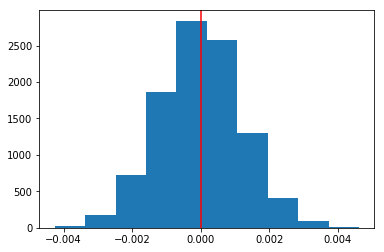

In [25]:
plt.hist(p_diffs)
plt.axvline(x = p_diff, color = 'red');

* 这个直方图大致是正态分布，而且零假设中的抽样p_diff在这个图中，符合期望

j.  在**p_diffs**列表的数值中，有多大比例大于 **ab_data.csv** 中观察到的实际差值？

In [26]:
#计算原数据观察值
p_new_obs = df2.query('landing_page == "new_page"')['converted'].mean()
p_old_obs = df2.query('landing_page == "old_page"')['converted'].mean()
p_diffs_obs = p_new_obs - p_old_obs
#转为array格式
p_diffs_obs = np.array(p_diffs_obs)
#计算比例
(p_diffs > p_diffs_obs).mean()

0.9047

k. 用文字解释一下你刚才在 **j.**中计算出来的结果。在科学研究中，这个值是什么？ 根据这个数值，新旧页面的转化率是否有区别呢？

**在这里给出你的答案。**


* j.所计算的结果是P值。P值是零假设为真的条件下，观察到统计量的概率，如果P值越大，说明观察到统计量的概率越大，这时我们没有足够证据拒绝零假设。根据j.所求出的数值，我们此时没有足够证据支持备择假设，即我们没有足够证据支持新页面的转化率高于旧页面的转化率。

l. 我们也可以使用一个内置程序 （built-in）来实现类似的结果。尽管使用内置程序可能更易于编写代码，但上面的内容是对正确思考统计显著性至关重要的思想的一个预排。填写下面的内容来计算每个页面的转化次数，以及每个页面的访问人数。使用 `n_old` 与 `n_new` 分别引证与旧页面和新页面关联的行数。

In [27]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()#旧页面转化的次数
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()#旧页面访问的次数
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()

m. 现在使用 `stats.proportions_ztest` 来计算你的检验统计量与 p-值。[这里](http://knowledgetack.com/python/statsmodels/proportions_ztest/) 是使用内置程序的一个有用链接。

In [28]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

在95%的置信水平下进行检验

In [29]:
from scipy.stats import norm
#95%置信水平下，单尾Z score的临界值
norm.ppf(1-(0.05))

1.6448536269514722

In [30]:
#Z score的显著性
norm.cdf(z_score)

0.09494168724097551

n. 根据上题算出的 z-score 和 p-value，我们认为新旧页面的转化率是否有区别？它们与 **j.** 与 **k.** 中的结果一致吗？

**在这里给出你的答案。**

* 计算出的p-value为0.9051，与j.中计算的结果一致，说明我们没有足够证据拒绝零假设，结论与k.一致。
* 计算的z-score的绝对值小于置信水平为95%下的临界值，说明我们没有足够证据拒绝零假设。

<a id='regression'></a>
### III - 回归分析法之一

`1.` 在最后一部分中，你会看到，你在之前的A / B测试中获得的结果也可以通过执行回归来获取。<br><br>

a. 既然每行的值是转化或不转化，那么在这种情况下，我们应该执行哪种类型的回归？

**在这里给出你的答案。**

* 应使用逻辑回归

b. 目标是使用 **statsmodels** 来拟合你在 **a.** 中指定的回归模型，以查看用户收到的不同页面是否存在显著的转化差异。但是，首先，你需要为这个截距创建一个列（ 原文：column） ，并为每个用户收到的页面创建一个虚拟变量列。添加一个 **截距** 列，一个 **ab_page** 列，当用户接收 **treatment** 时为1， **control** 时为0。

In [31]:
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0



c. 使用 **statsmodels** 导入你的回归模型。 实例化该模型，并使用你在 **b.** 中创建的2个列来拟合该模型，用来预测一个用户是否会发生转化。

In [32]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. 请在下方提供你的模型摘要，并根据需要使用它来回答下面的问题。

In [33]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        14:27:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. 与 **ab_page** 关联的 p-值是多少？ 为什么它与你在 **II** 中发现的结果不同？<br><br>  **提示**: 与你的回归模型相关的零假设与备择假设分别是什么？它们如何与 **Part II** 中的零假设和备择假设做比较？

**在这里给出你的答案。**

* 与ab_page有关的P值是0.19 
* 这个值与**Part II**发现的P值(0.905)有些不同，但是P值很大时，表明我们没有足够证据拒绝零假设。
* 出现这个不同的原因是回归模型的零假设与**Part II**的零假设与备择假设不同：
* **Part II**的零假设是$H_0: p_{new} - p_{old} \leq 0$ ，备择假设是$H_1: p_{new} - p_{old} > 0$
* 此回归模型的的零假设是 $H_0: \beta _{1} = 0$，备择假设是$H_1: \beta_{1}\neq 0$ 
* 在进行假设检验时，针对**Part II**检验是否拒绝零假设，即旧页面的转化率是否大于或等于新页面，这是一个单尾检验(one-tail test)，P值越大，说明越无法拒绝零假设。而回归模型中的假设检验的是拟合的自变量系数是否为零，这是一个双尾检验(two-tails test)，所得的P值越小，说明越没有足够证据支持零假设，即我们没有足够的证据拒绝备择假设 $H_1: \beta_{1}\neq 0$，回归结果具有统计显著性。



f. 现在，你一定在考虑其他可能影响用户是否发生转化的因素。讨论为什么考虑将其他因素添加到回归模型中是一个不错的主意。在回归模型中添加附加项有什么弊端吗？

**在这里给出你的答案。**

* 在回归模型中添加其他因素可能会在一定程度上帮助我们理解模型，在一定程度上帮助我们避免辛普森悖论，但是添加附加项时，如果构建多元线性回归模型，首先要考虑附加项的与因变量是否为非线性关系，以及异常值和多重共线性的影响。

g. 现在，除了测试不同页面的转化率是否会发生变化之外，还要根据用户居住的国家或地区添加一个 effect 项。你需要导入 **countries.csv** 数据集，并将数据集合并在适当的行上。 [这里](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) 是链接表格的文档。 

这个国家项对转化有影响吗？不要忘记为这些国家的列创建虚拟变量—— **提示: 你将需要为这三个虚拟变量增加两列。** 提供统计输出，并书面回答这个问题。

In [34]:
#读取文件，查看数据
con_df = pd.read_csv('countries.csv')
con_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
#根据user_id进行连接
df3 = con_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [36]:
#构建effect项，先查看共有多少国家
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [37]:
#构建虚拟变量，增加UK、US列
df3[['UK', 'US']] = pd.get_dummies(df3['country'])[['UK', 'US']]
#进行逻辑回归
log_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        14:27:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

结论：
* 回归模型中国家的的baseline是CA，回归结果的P值中，$P_{UK} = 0.074$，$P_{US} = 0.130$，均大于0.05，说明无统计显著性，没有足够证据拒绝两个自变量系数的零假设$H_0: \beta_{UK} =  0$，$H_0: \beta_{US} =  0$。

h. 虽然你现在已经查看了国家与页面在转化率上的个体性因素，但现在我们要查看页面与国家/地区之间的相互作用，测试其是否会对转化产生重大影响。创建必要的附加列，并拟合一个新的模型。  

提供你的摘要结果，以及根据结果得出的结论。

**提示：页面与国家/地区的相互作用**
```
df3['new_CA'] = df3['new_page'] * df3['CA']
df3['new_UK'] = df3['new_page'] * df3['UK']
```

In [38]:
#创建页面与国家的相互作用列
df3['page_US'] = df3['ab_page'] * df3['US']
df3['page_UK'] = df3['ab_page'] * df3['UK']

In [39]:
#页面*国家的逻辑回归
log_mod3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US', 'page_UK', 'page_US']])
results3 = log_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:               3.482e-05
Time:                        14:28:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
page_US        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

结论：
* 回归模型中国家的的baseline是CA，回归结果的Pseudo R-squ有了少量提升，但在各项系数的P值中，$P_{page\_UK}\ = 0.168$，$P_{page\_US}\ = 0.872$，均大于0.05，说明无统计显著性，即没有足够证据拒绝两个自变量系数的零假设$H_0: \beta_{page\_UK} =  0$，$H_0: \beta_{page\_US} =  0$。

考虑到实验时长对结果可能带来的影响计算整个数据集的实验花费时间

In [40]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [41]:
df2.timestamp.max(), df2.timestamp.min()

(Timestamp('2017-01-24 13:41:54.460509'),
 Timestamp('2017-01-02 13:42:05.378582'))

* 整个新旧页面的测试是从2017年1月2号开始，到2017年1月24日结束，共22天。

<a id='conclusions'></a>
## 总结

* 对新旧页面的数据集进行了单侧测试的假设检验，根据检验结果，并没有拒绝零假设，即旧页面的转化率大于或等于新页面，在新旧页面之间并没有显著的差异，根据这个检验结果，建议保留旧页面。


* 对转化率建立的逻辑回归模型也得出了与A/B测试一致的结果，在添加了国家的相关数据后，进行了国家、页面与转化率的逻辑回归，以及国家页面的相互作用与转化率的逻辑回归模型，国家、国家页面的相互作用并没有统计显著性，说明国家并不是对转化率影响很大的因素，从Pseudo R-squ来看，模型的拟合效果并不是很好，说明可以对模型继续修正来获得更好的拟合效果。


* 分析的结论只是根据当前现有数据得出的，要得到可靠的显著结果，需要有足够的流量和转化率，如果老用户存在抗拒改变的心理，也会影响结果，另外，实验的持续时间是22天，也是影响最终结果的重要因素，在进行决策时，要以实际情况为准。